In [5]:
import requests
import json 

lat="42.0987"
lon="-75.9125"
genius=requests.get(f"https://api.weather.gov/points/{lat},{lon}")


json_file=genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0987,-75.9125',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9125, 42.0987]},
 'properties': {'@id': 'https://api.weather.gov/p

In [6]:
forecast=json_file["properties"]["forecast"]
new_request=requests.get(forecast)

json=new_request.json()
json

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9315877, 42.1111321],
    [-75.9357021, 42.0895688],
    [-75.9066508, 42.0865146],
    [-75.90253039999999, 42.1080777],
    [-75.9315877, 42.1111321]]]},
 'properties': {'updated': '2023-03-21T13:25:23+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-21T14:00:44+00:00',
  'updateTime': '2023-03-21T13:25:23+00:00',
  'validTimes': '2023-03-21T07:00:00+00:00/P7DT18H',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 274.0152},
  'periods': [{'number': 1,
    'name': 'Today',
    'startTime': '2023-03-21T10:00:00-04:00',
    'endTime': '2023-03-21T18:00:00-04:00',
    'isD

In [7]:
days=json["properties"]["periods"]
days
for i in days:
    print(i["name"])
    print(i["temperature"],i["temperatureUnit"])
    print(i["detailedForecast"])

Today
56 F
Sunny, with a high near 56. West wind 6 to 10 mph.
Tonight
34 F
Mostly cloudy, with a low around 34. Southeast wind 1 to 7 mph.
Wednesday
57 F
Mostly cloudy, with a high near 57. South wind 1 to 9 mph.
Wednesday Night
44 F
A chance of rain showers after 8pm. Mostly cloudy, with a low around 44. South wind 6 to 10 mph. Chance of precipitation is 50%. New rainfall amounts less than a tenth of an inch possible.
Thursday
60 F
Rain showers. Cloudy, with a high near 60. Southwest wind 8 to 15 mph. Chance of precipitation is 80%.
Thursday Night
36 F
Rain showers. Cloudy, with a low around 36. Chance of precipitation is 80%.
Friday
46 F
A chance of rain showers. Cloudy, with a high near 46. Chance of precipitation is 40%.
Friday Night
35 F
A chance of rain showers before 8pm, then a slight chance of rain and snow showers between 8pm and 2am, then a chance of rain and snow showers. Cloudy, with a low around 35. Chance of precipitation is 50%.
Saturday
44 F
Rain and snow showers likel

In [8]:
from matplotlib import pyplot as plt 
import csv
import numpy as np
import pandas as pd 

weather_file=open("weather_forecast.csv","w",newline="",encoding="utf-8")
csv_writer=csv.writer(weather_file)
csv_writer.writerow(["Day","Temperature","Description"])

for i in days:
    name=(i["name"])
    temp=(i["temperature"])
    desc=(i["detailedForecast"])
    csv_writer.writerow([name,temp,desc])
        
weather_file.close()

sheet=pd.read_csv("weather_forecast.csv")
sheet

,Day,Temperature,Description
0,Today,56,"Sunny, with a high near 56. West wind 6 to 10 ..."
1,Tonight,34,"Mostly cloudy, with a low around 34. Southeast..."
2,Wednesday,57,"Mostly cloudy, with a high near 57. South wind..."
3,Wednesday Night,44,A chance of rain showers after 8pm. Mostly clo...
4,Thursday,60,"Rain showers. Cloudy, with a high near 60. Sou..."
5,Thursday Night,36,"Rain showers. Cloudy, with a low around 36. Ch..."
6,Friday,46,"A chance of rain showers. Cloudy, with a high ..."
7,Friday Night,35,"A chance of rain showers before 8pm, then a sl..."
8,Saturday,44,"Rain and snow showers likely. Cloudy, with a h..."
9,Saturday Night,35,"Rain showers likely before 2am, then a slight ..."


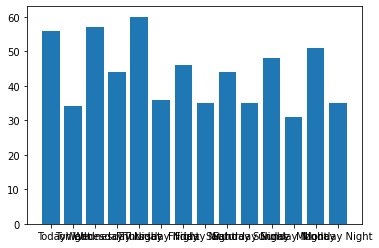

In [9]:
df=pd.DataFrame(sheet)
day=df["Day"]
temps=df["Temperature"]

plt.bar(day,temps)
plt.title=("Weather Forecast")
plt.xlabel=("Day")
plt.ylabel=("Temperature(F)")

plt.show()

In [10]:
holiday=requests.get("https://date.nager.at/api/v3/CountryInfo/US") #/api/v3/CountryInfo/{countryCode} returns info on country by ISO code
holiday_file=holiday.json()
holiday_file

avail_count=requests.get("https://date.nager.at/api/v3/AvailableCountries") #/api/v3/AvailableCountries list of all countries the API sources data from/about
avail_count_file=avail_count.json()
avail_count

long_weekend=requests.get("https://date.nager.at/api/v3/LongWeekend/2023/US") #/api/v3/LongWeekend/{year}/{countryCode} returns all dates of long weekend holidays in selected year by country
long_file=long_weekend.json()
long_file

pub_holiday=requests.get("https://date.nager.at/api/v3/PublicHolidays/2023/US") #/api/v3/PublicHolidays/{year}/{countryCode} returns all holdiay names and dates in a year by country 
pub_file=pub_holiday.json()
pub_file

today_holiday=requests.get("https://date.nager.at/api/v3/IsTodayPublicHoliday/2023?countyCode=US&offset=4") #/api/v3/IsTodayPublicHoliday/{countryCode} returns whether or not today is a public holiday by year and country
today_holiday.raise_for_status() #https://stackoverflow.com/questions/16573332/jsondecodeerror-expecting-value-line-1-column-1-char-0
if today_holiday.status_code == 204:
    print("Today is not a public holiday")
elif today_holiday.status_code==200:
    print("Today is a public holiday")
today_holiday

next_pub=requests.get("https://date.nager.at/api/v3/NextPublicHolidays/US") #/api/v3/NextPublicHolidays/{countryCode} returns the date of the next public holiday this year by country
next_file=next_pub.json()
next_file

next_world=requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide") #/api/v3/NextPublicHolidaysWorldwide returns the date of the next holiday celebrated in the world and country/countries that celebrate it
next_world_file=next_world.json()
next_world_file

Today is not a public holiday


[{'date': '2023-03-21',
  'localName': '春分の日',
  'name': 'Vernal Equinox Day',
  'countryCode': 'JP',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-21',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'NA',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-21',
  'localName': 'Día del abolición de la esclavitud',
  'name': 'Slavery Abolition Anniversary',
  'countryCode': 'VE',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-21',
  'localName': 'Human Rights Day',
  'name': 'Human Rights Day',
  'countryCode': 'ZA',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 1990,
  'types': ['Public']},
 {'date': '2023-03-22',
  'localName': 'Dita e Sulltan Nevruzit',
  'name': 'Nowruz',
  'countryCode': 'AL',
  'fixed': True,

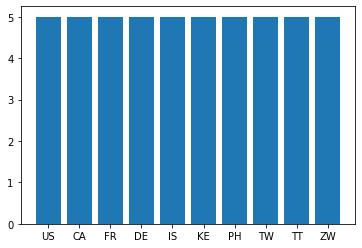

In [14]:
countries=["US","CA","FR","DE","IS","KE","PH","TW","TT","ZW"]
year=2023

world_holidays=open("world_holidays.csv","w",newline="",encoding="utf-8")
csv_writer=csv.writer(world_holidays)
csv_writer.writerow(["Country","Number of Holidays"])

for country in countries:
    holiday_count_req=requests.get("https://date.nager.at/api/v3/PublicHolidays/{year}/{country}")
    holiday_count_file=holiday_count_req.json()
    country_count=len(holiday_count_file)
    csv_writer.writerow([country,country_count])
world_holidays.close()

holiday_sheet=pd.read_csv("world_holidays.csv")
holiday_sheet

df=pd.DataFrame(holiday_sheet)
cou=df["Country"]
hol=df["Number of Holidays"]

plt.bar(cou,hol)
plt.xlabel=("Country")
plt.ylabel=("Number of Holidays")

plt.show()